In [12]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import validation_curve, cross_val_score, learning_curve, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import SVC
import warnings
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import ShuffleSplit


warnings.filterwarnings("ignore", category=FutureWarning)

# Coding Challenge
## Objective: improve performance
### Benchmark: https://triamus.github.io/project/lending-club-loan-data-in-r/#loan-amount-and-income

Some steps with preprocessing data was skipped, due to time constraint. The project is mainly supposed to show the improvement of the performance

# 1. First Steps

<li> Load Data 
<li> Use algorithm/ techinques to intelligently remove rest of the features

## Load Data

In [17]:
dat = np.load("data.npz",allow_pickle=True)
values = dat["arr_0"]
header = dat["arr_1"]
dt = pd.DataFrame(values,columns = header)

# Feature Selection 

Problem of using all variables? Overfitting. Instead of handpicking variables, I'll try to use an algorithm to pick "right" features.
<br>
Options:
<li> Forward Selection
<li> Backward Selection
<li> Mutual Information Classification
<br>
Due to computing capacity and a sizable dataset, I'll use Mutual Information Classification to pick up first 30 and then Forward Selection to get 10 "best" features. In that way I will skip features that are correlated to each other.

## Mutual Information Classification

Given variables $X$ and $Y$, Mutual information (MI) measures the information that $X$ and $Y$ share. We will first calculate MI for each variable and pick up "top" 40 features.

NOTE: On my computer this section run for over 2 hours. I uploaded parameters that can be loaded directly. To save time proceed to next section to load parameters.

In [18]:
X = dt.drop("loan_status", axis=1)
y = dt["loan_status"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# If paramteters exist, load. Else, mutual information.
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([9.56982197e-03, 9.74521037e-03, 8.67090192e-03, 1.07573121e-01,
       4.34857431e-02, 3.38541568e-02, 7.12067888e-02, 3.22440664e-02,
       4.17404710e-03, 2.05809113e-04, 6.02778197e-03, 3.01477774e-03,
       2.32524959e-03, 1.66777032e-02, 1.01894601e-03, 8.46115133e-04,
       7.71053379e-03, 3.66796306e-03, 8.96972972e-04, 2.60786583e-03,
       3.92096017e-03, 5.10363161e-02, 4.02431848e-02, 4.02253195e-02,
       1.00335615e-01, 9.72672907e-02, 5.17325655e-01, 2.71680560e-02,
       2.64607058e-02, 2.41328181e-01, 2.27000439e-01, 3.29450815e-01,
       6.69603049e-02, 0.00000000e+00, 1.12394934e-03, 1.42765601e-01,
       3.59398528e-03, 6.12802883e-03, 2.75865965e-04, 5.03055818e-04,
       3.49377200e-03, 7.10840087e-03, 9.99199224e-03, 5.54089403e-03,
       9.66304752e-03, 5.66709516e-03, 4.43024300e-03, 5.82852019e-03,
       9.25025122e-03, 1.12392900e-02, 5.53735872e-03, 7.03804395e-03,
       3.88011998e-03, 6.09430679e-03, 2.80323243e-03, 1.00277253e-02,
      

In [23]:
mi_series = pd.Series(mutual_info)
mi_series.index = X.columns
mi_series.sort_values(ascending=False)

total_rec_prncp                               0.517326
last_pymnt_amnt                               0.329451
recoveries                                    0.241328
collection_recovery_fee                       0.227000
NO_HARDSHIP                                   0.150061
application_type                              0.142766
term                                          0.107573
total_pymnt                                   0.100336
total_pymnt_inv                               0.097267
grade                                         0.071207
last_credit_pull_d                            0.066960
debt_consolidation                            0.051586
initial_list_status                           0.051036
int_rate                                      0.043486
MORTGAGE                                      0.041797
out_prncp                                     0.040243
out_prncp_inv                                 0.040225
installment                                   0.033854
emp_length

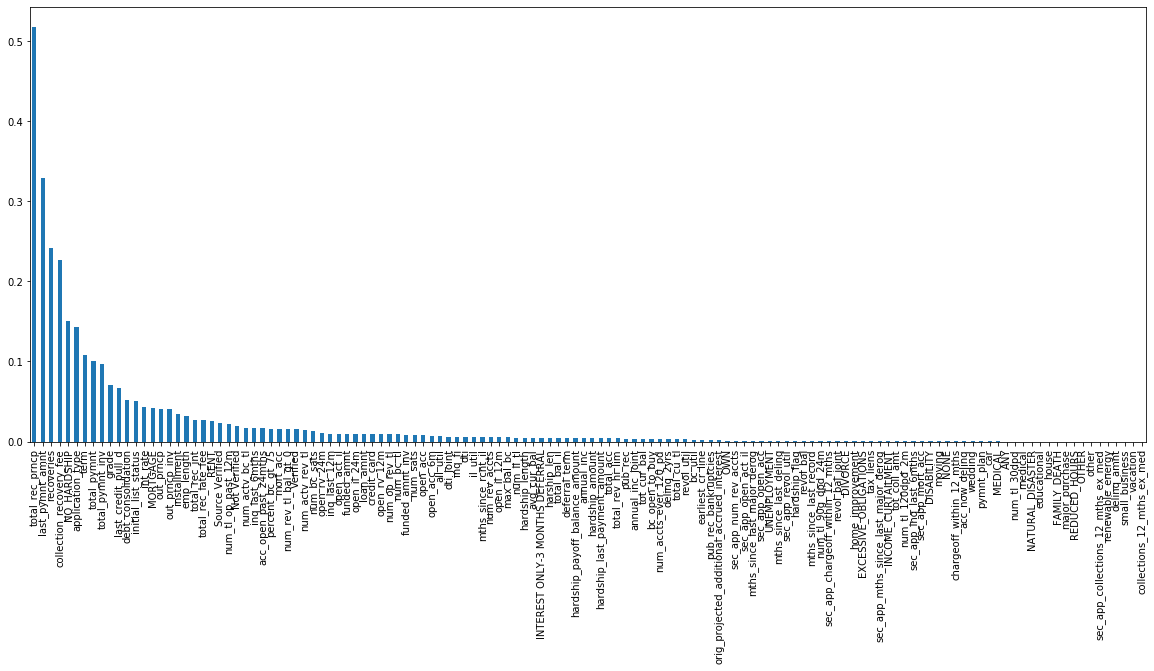

In [24]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.show()

In [25]:
# If saved parameters exist, load. Else, run function for best features 
k_best_features = SelectKBest(mutual_info_classif, k=30).fit(x_train, y_train)

In [26]:
print('Selected top 30 features: {}'.format(x_train.columns[k_best_features.get_support()]))

Selected top 30 features: Index(['term', 'int_rate', 'installment', 'grade', 'emp_length',
       'inq_last_6mths', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
       'acc_open_past_24mths', 'mort_acc', 'num_actv_bc_tl',
       'num_tl_op_past_12m', 'percent_bc_gt_75', 'Not Verified',
       'Source Verified', 'debt_consolidation', 'MORTGAGE', 'RENT',
       'NO_HARDSHIP'],
      dtype='object')


In [27]:
columns_mutual_information = x_train.columns[k_best_features.get_support()]

In [28]:
X = X[columns_mutual_information]

In [31]:
columns_mutual_information

Index(['term', 'int_rate', 'installment', 'grade', 'emp_length',
       'inq_last_6mths', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
       'acc_open_past_24mths', 'mort_acc', 'num_actv_bc_tl',
       'num_tl_op_past_12m', 'percent_bc_gt_75', 'Not Verified',
       'Source Verified', 'debt_consolidation', 'MORTGAGE', 'RENT',
       'NO_HARDSHIP'],
      dtype='object')

# Using Left Features Use Forward Selection to pick up 12 variables

I will use a Forward Looking Algorithm using a simple logistic regression

In [30]:
logisticRegr = LogisticRegression()


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


X_forward = X_train[columns_mutual_information]
X_forward_test = X_test[columns_mutual_information]



sfs1 = SFS(logisticRegr,
           k_features=15,
           forward=True,
           floating=False,
           verbose=2,
           scoring='recall',
           cv=5,
           n_jobs=-1)

mu_col = sfs1.fit(X_forward_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.0s finished

[2019-08-13 01:48:36] Features: 1/15 -- score: 0.5862724661431761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:  1.2min finished

[2019-08-13 01:49:47] Features: 2/15 -- score: 0.7004534576953725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  1.3min finished

[2019-08-13 01:51:02] Features: 3/15 -- score: 0.7286410937642669[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.3min finished

[2019-08-13 01:52:19] Features: 4/15 -- score: 0.8685868290305369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  1.5min finished



In [110]:
columns_forward = list(sfs1.subsets_[10]['feature_names'])

In [48]:
columns_forward

['int_rate',
 'installment',
 'grade',
 'out_prncp',
 'total_pymnt_inv',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'Source Verified',
 'NO_HARDSHIP']

In [49]:
X = X[columns_forward]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [131]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)


# Part 6: Try with new variable set
First, I will use the new parameters with a simple logisti regression, then I will experiement around with SVM. Finally, the plan is to set up a small neural network.

In [132]:
logisticRegr = LogisticRegression(random_state = 0)


In [134]:
logisticRegr.fit(X_train_scale, y_train)
predictions = logisticRegr.predict(X_test_scale)


print("F1: " + str(metrics.f1_score(y_test, predictions)))
print("Accuracy: " + str(metrics.accuracy_score(y_test, predictions)))
print("Precision: " + str(metrics.precision_score(y_test, predictions)))
print("Recall: " + str(metrics.recall_score(y_test, predictions)))
print("ROC: " + str(metrics.roc_auc_score(y_test, predictions)))

F1: 0.9439762897449617
Accuracy: 0.976318137865376
Precision: 0.9911092451502167
Recall: 0.9011227124733355
ROC: 0.9494120080128896


# Regularization

In [56]:
logisticRegr = LogisticRegression(penalty='l2', random_state = 0, C=100)


In [58]:
logisticRegr.fit(X_train_scale, y_train)
predictions = logisticRegr.predict(X_test_scale)


print("F1: " + str(metrics.f1_score(y_test, predictions)))
print("Accuracy: " + str(metrics.accuracy_score(y_test, predictions)))
print("Precision: " + str(metrics.precision_score(y_test, predictions)))
print("Recall: " + str(metrics.recall_score(y_test, predictions)))

F1: 0.9398909041481245
Accuracy: 0.9747173066262979
Precision: 0.9922634422690575
Recall: 0.8927697316717189


In [59]:
print(metrics.confusion_matrix(y_test, predictions))

[[312601    620]
 [  9551  79519]]


# CV

In [61]:
# Using CV
classifier = LogisticRegression()
f1 = cross_val_score(classifier, X_train_scale, y_train, cv=5, scoring='f1', verbose=1, n_jobs=-1)
recall = cross_val_score(classifier, X_train_scale, y_train, cv=5, scoring='recall', verbose=1, n_jobs=-1)
accuracy = cross_val_score(classifier, X_train_scale, y_train, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
scores = cross_val_score(classifier, X_train_scale, y_train, cv=5, scoring='precision', verbose=1, n_jobs=-1)

print('F1' , np.mean(f1))
print('Accuracy' , np.mean(scores))
print('Precision' , np.mean(scores))
print('Recall' , np.mean(recall))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 0.9457352311357795
Accuracy 0.9912447625574675
Precision 0.9912447625574675
Recall 0.9042233637333934


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.7s finished


# Learning Curves

In [62]:
train_size = np.arange(0.2, 1, 0.1)
train_size

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [63]:
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(),
                                                        X = X_train_scale,
                                                        y = y_train,
                                                        train_sizes = train_size, 
                                                        cv = 5,
                                                        scoring = 'roc_auc',
                                                        n_jobs= -1)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', test_scores)


Training scores:

 [[0.98901567 0.9886395  0.9886395  0.9886395  0.9886395 ]
 [0.98859586 0.98860747 0.98879893 0.98879893 0.98879893]
 [0.98893656 0.98894228 0.98885917 0.98885917 0.98885917]
 [0.98895403 0.98895156 0.9888112  0.98881391 0.98881391]
 [0.9889146  0.98891321 0.98879247 0.98897864 0.98897864]
 [0.98896893 0.98896638 0.9888666  0.98895193 0.98895193]
 [0.98902329 0.98901882 0.98893633 0.98898338 0.9889604 ]
 [0.98914823 0.98914461 0.98906896 0.98911239 0.9890943 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.98840733 0.98859734 0.98880109 0.98853022 0.98872069]
 [0.98860145 0.98877086 0.98895444 0.98870817 0.98889146]
 [0.98865614 0.98880103 0.9889807  0.98872184 0.98891988]
 [0.98876711 0.98890423 0.98904236 0.98878529 0.98898065]
 [0.98880271 0.98893361 0.98908468 0.98882994 0.98902698]
 [0.98886746 0.98899433 0.98914844 0.98885895 0.98905812]
 [0.98891475 0.98903834 0.98919352 0.988927   0.98912613]
 [0.98892527 0.

(0.98, 1)

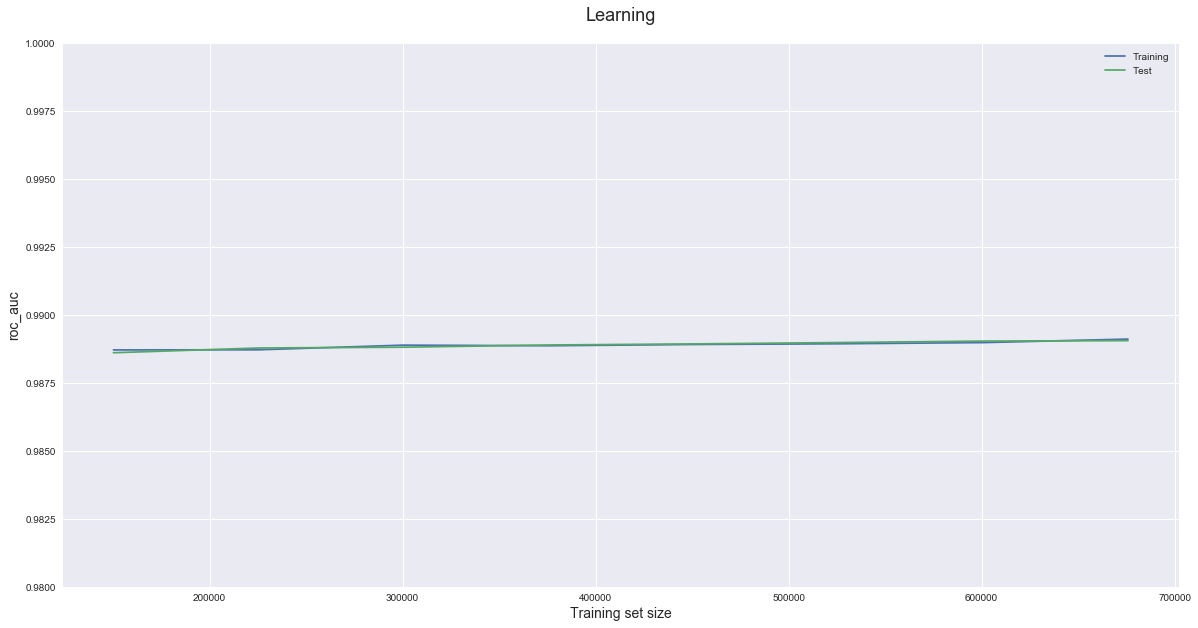

In [64]:
train_scores_mean = train_scores.mean(axis = 1)
test_scores_mean = test_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training')
plt.plot(train_sizes, test_scores_mean, label = 'Test')
plt.ylabel('roc_auc', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.98,1)


In [65]:
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(),
                                                        X = X_train_scale,
                                                        y = y_train,
                                                        train_sizes = train_size, 
                                                        cv = 5,
                                                        scoring = 'f1',
                                                        n_jobs= -1)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', test_scores)


Training scores:

 [[0.94672583 0.94501275 0.94501275 0.94501275 0.94501275]
 [0.94555514 0.94396289 0.94448239 0.94448239 0.94448239]
 [0.94615693 0.94515525 0.94588961 0.94588961 0.94588961]
 [0.94511884 0.94438742 0.94564083 0.94563126 0.94563126]
 [0.9455409  0.94481804 0.94595784 0.9459509  0.9459509 ]
 [0.94529094 0.94471752 0.94560778 0.94615405 0.94615405]
 [0.94498382 0.94436325 0.94528225 0.94548159 0.94560982]
 [0.94557143 0.94508045 0.945913   0.94606855 0.94555992]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.94651446 0.94482247 0.94523046 0.94657562 0.945806  ]
 [0.94545729 0.94409125 0.94457589 0.9458159  0.9451376 ]
 [0.94603358 0.94483869 0.94574306 0.94692976 0.94631682]
 [0.94499384 0.94430456 0.9458304  0.9471108  0.94656834]
 [0.9450295  0.94446123 0.94563932 0.94723763 0.94667152]
 [0.94462975 0.94426188 0.9453873  0.94767478 0.94704324]
 [0.9440526  0.94394277 0.94489339 0.94697198 0.94612464]
 [0.94477308 0.

ValueError: x and y must have same first dimension, but have shapes (8,) and (5,)

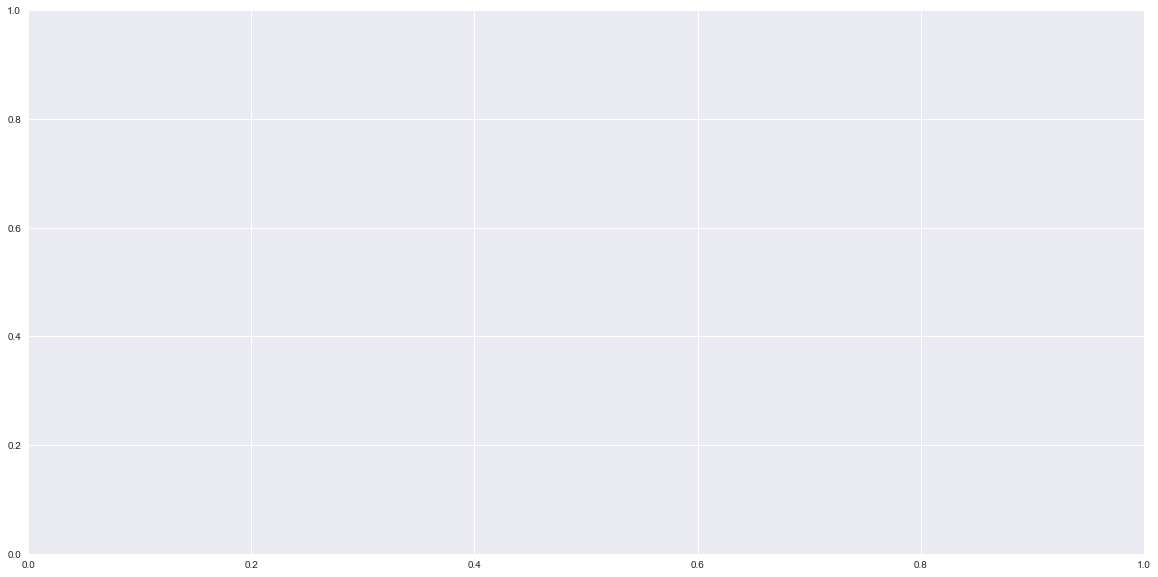

In [91]:
train_scores_mean = train_scores.mean(axis = 1)
test_scores_mean = test_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training')
plt.plot(train_sizes, test_scores_mean, label = 'Test')
plt.ylabel('f1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.90,1)


# Regularization

In [67]:
#list(np.power(10.0, np.arange(-10, 10)))

In [68]:
C_param_range = [0.05, 0.1, 1, 1.5, 2]

In [69]:
lr = LogisticRegression(penalty='l2', random_state = 0)

In [70]:
train_scores, test_scores = validation_curve(estimator=lr,
                                             X=X_train_scale,
                                             y=y_train,
                                             param_name='C',
                                             param_range=C_param_range,
                                             cv=5,
                                             scoring="roc_auc",
                                             n_jobs=-1)


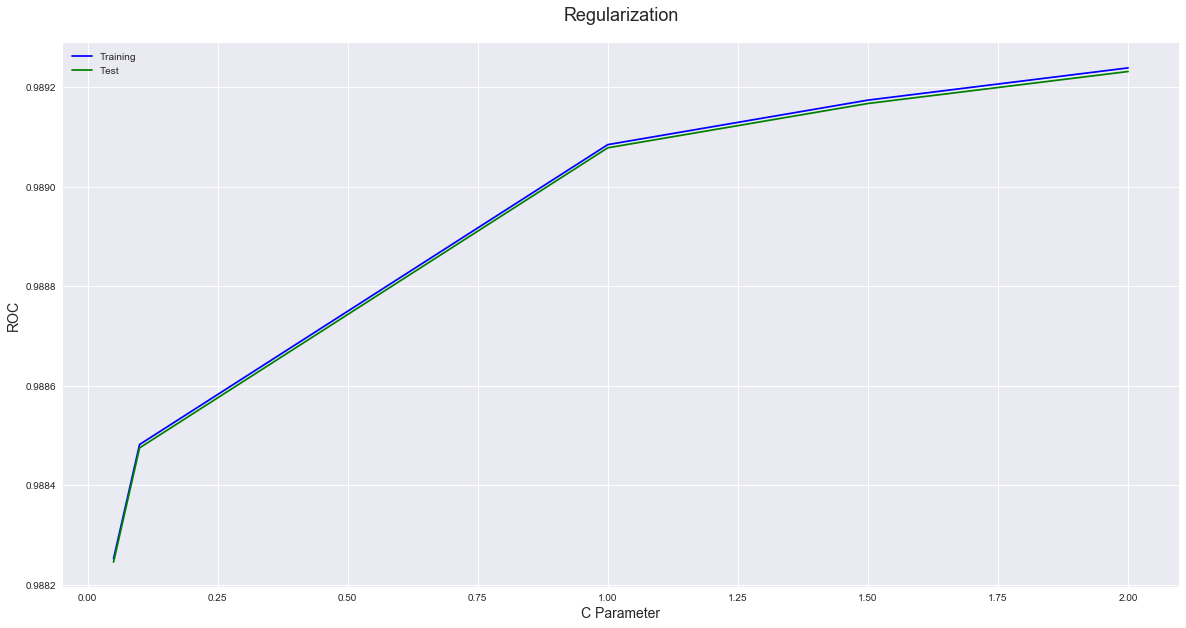

In [71]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.figure(figsize=(20,10))
plt.style.use('seaborn')
plt.plot(C_param_range, train_mean, color='blue', label='Training')
plt.plot(C_param_range, test_mean, color='green', label='Test')
plt.ylabel('ROC', fontsize = 14)
plt.xlabel('C Parameter', fontsize = 14)
plt.title('Regularization', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0.8,1)
plt.show()




# 1st Conclusion

Tasks done:
1. Picked variables on Mutual Information
2. Picked variables left with forward search algorithm
3. Logistic Regression model
4. Logistic Regression with regularization (validation curve)

Conclusion:
1. Picking up right variables increased accuracy, precision , and recall
2. Learning Curve shows convergence
3. Validation curve shows no variance bias

# Random Forest

In [124]:
clf=RandomForestClassifier(n_estimators=100)


In [125]:
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
predictions = clf.predict(X_test)

In [127]:
metrics.confusion_matrix(y_test, predictions)


array([[312532,    719],
       [  3316,  85724]])

### Consider

n_estimators = number of trees in the foreset <br>
max_features = max number of features considered for splitting a node<br>
max_depth = max number of levels in each decision tree<br>
min_samples_split = min number of data points placed in a node before the node is split<br>
min_samples_leaf = min number of data points allowed in a leaf node<br>
bootstrap = method for sampling data points (with or without replacement)<br>


# Use Randomized Grid Search to find "better" parameters

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [103]:
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]


In [99]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [0.01, 0.05, 0.1, 0.15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.0001, 0.001, 0.01, 0.004]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [80]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [81]:
rf = RandomForestClassifier(n_estimators=100)


In [82]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs=-1, return_train_score=True)


In [83]:
X_train.shape

(268193, 10)

In [84]:
rf_random.fit(X_train, y_train);


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 108.6min finished


In [117]:
rf_random.best_params_


{'n_estimators': 500,
 'min_samples_split': 0.05,
 'min_samples_leaf': 0.0001,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [119]:
clf=RandomForestClassifier(n_estimators = 500,
                           max_features = 'sqrt',
                           max_depth = 50,
                           min_samples_split = 0.05,
                           min_samples_leaf = 0.0001,
                           bootstrap= False)

In [120]:
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=0.05,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
predictions = clf.predict(X_test)
metrics.confusion_matrix(y_test, predictions)


array([[312802,    449],
       [ 12738,  76302]])

In [122]:
rf_random.cv_results_


{'mean_fit_time': array([143.6804057 ,  35.53154055, 135.11643759,  34.05774935,
        119.74488068, 244.44730425,  38.80984624,  95.74307545,
        171.24260402, 177.89509964, 155.11033217,  24.62411141,
        179.55977742,  31.18306629,  63.24896789,  43.43350005,
         24.6427327 ,  69.24946801,  60.22133366,  27.80844164,
         86.95446769, 137.98536936,  33.60348503,  22.76116705,
        121.29584781,  57.17485126,  99.40283457,  18.06834594,
         38.83820192,  20.34408665, 133.2412467 , 108.52446866,
        189.71213531,  34.96707042,  17.47452497,  89.40092897,
        110.78454526,  99.76296735, 193.30259975, 101.88359046,
         19.51943469,  35.56148505,  19.23461715,  17.54882105,
         78.95507662, 149.95794392,  63.07245731,  24.602434  ,
         48.76467609, 114.09790667,  28.92836221,  52.0857145 ,
         50.05628403, 109.39087296,  24.55427639, 148.46540197,
         83.22449946,  24.69918474, 136.46065736,  99.49419157,
         96.34631809, 1

In [123]:
print("F1: " + str(metrics.f1_score(y_test, predictions)))
print("Accuracy: " + str(metrics.accuracy_score(y_test, predictions)))
print("Precision: " + str(metrics.precision_score(y_test, predictions)))
print("Recall: " + str(metrics.recall_score(y_test, predictions)))
print("ROC: " + str(metrics.roc_auc_score(y_test, predictions)))


F1: 0.9204600973514848
Accuracy: 0.9672202460408013
Precision: 0.9941499133561778
Recall: 0.8569407008086254
ROC: 0.9277536727241138
